In [1]:
import numpy as np
import matplotlib.pyplot as plt # to visualize the model, the 'data', and the loss function as we iterate and train

In [2]:
lr = 0.0001 # learning rate, step-size proportion

m = np.random.rand() # slope, m in  y = m x + b
b = np.random.rand() # intercept, b in  y = m x + b

def y(x):
    # our 'model', just a linear function of 1 input and 1 output, 1 weight and 1 bias
    return m * x + b

def MSE(y, y_hat):
    # LOSS FUNCTION / COST FUNCTION
    # 'mean squared error', while we just have 1 input and 1 output in the model per sample, 
    # we can feed many samples to the model at a time for training in the form of a vector of inputs, 
    # and vector of outputs/labels
    return np.mean((y_hat - y)**2)

def _dLdm(y, y_hat, x):
    # negative partial derivative of loss with respect to m
    return 2*x*(y_hat-y)

def _dLdb(y, y_hat):
    # negative partial derivative of loss with respect to b
    return 2*(y_hat-y)

def step_m(y,y_hat, x):
    # step in the negative gradient direction, on the m axis
    return _dLdm(y, y_hat, x) * lr

def step_b(y,y_hat):
    # step in the negative gradient direction, on the b axis
    return _dLdb(y, y_hat) * lr

In [3]:
def _y_hat(x):
    return 5 * x + 3

x_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = _y_hat(x_train) + np.random.rand(len(x_train))*5 -2.5 # add some noise to the data

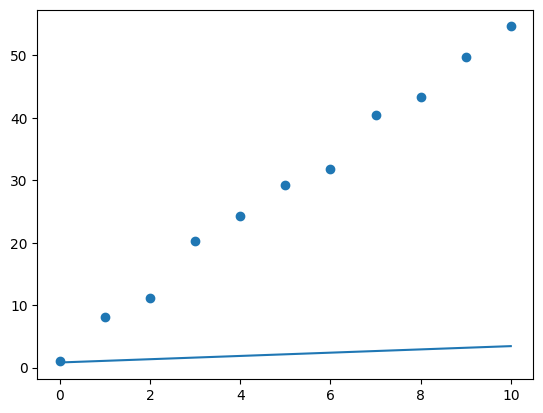

949.9834174189335


In [4]:
# After just instantiating the model with random parameters, we do not expect it to be accurate yet.
plt.scatter(x_train, y_train)
plt.plot(y(x_train))
plt.show()
print(MSE(y(x_train), y_train)) # high loss

In [5]:
linearmodel_losses = []

for i in range(500):
    
    index = np.random.randint(0, len(x_train))
    
    sample = x_train[index]
    
    prediction = y(sample)
    
    label = y_train[index]
    
    b += step_b(prediction, label)
    m += step_m(prediction, label, sample)
    
    L = MSE(prediction, label)
    linearmodel_losses.append(L)

Loss: 2.8510075089154583, m : 5.179512038932977, b: 1.5710411595025284


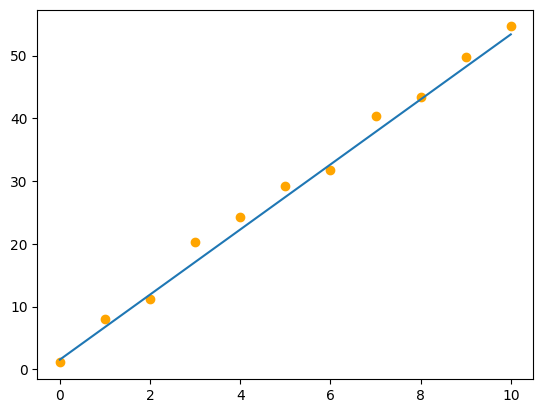

In [6]:
y = y(x_train)
print(f"Loss: {MSE(y, y_train)}, m : {m}, b: {b}")
plt.scatter(x_train, y_train, c='orange')
plt.plot(y)
plt.show()

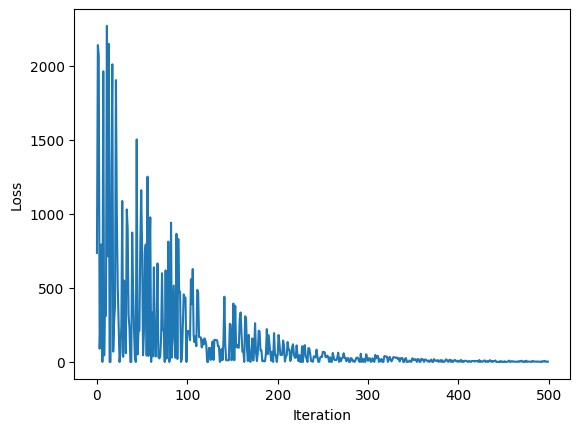

In [7]:
plt.plot(linearmodel_losses)#[0:400], )#[0:20])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [8]:
# Let's now move on and do a non-linear regression!! For example, a parabola, let's fit a curve to some fake trajectory path.

a = np.random.rand()
g = np.random.rand() # well, b was used for the line intercept, so let's use 'g'
c = np.random.rand()

def y2(x):
    return a * x**2 + g * x + c

# same loss function as defined above, MSE

def _dLda(y, y_hat, x):
    # negative partial derivative of loss with respect to a
    return 2*(y_hat-y) * x**2 # dyda is x**2

def _dLdg(y, y_hat, x):
    # negative partial derivative of loss with respect to b
    return 2*(y_hat-y) * x # dydg is just x

def _dLdc(y, y_hat):
    # negative partial derivative of loss with respect to b
    return 2*(y_hat-y) # dydc is just 1

def step_a(y,y_hat, x):
    # step in the negative gradient direction, on the a axis
    return _dLda(y, y_hat, x) * lr

def step_g(y,y_hat, x):
    # step in the negative gradient direction, on the g axis
    return _dLdg(y, y_hat, x) * lr

def step_c(y,y_hat):
    # step in the negative gradient direction, on the c axis
    return _dLdc(y, y_hat) * lr

In [9]:
def _y_hat(t):
    #return - (t-3)**2 + 5 # not allowed to (t-3) unless your model also has a (x- h)**2 for example to learn
    return - (t)**2 + 15 

x_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = _y_hat(x_train) + np.random.rand(len(x_train))*5 -2.5 # add some noise to the data

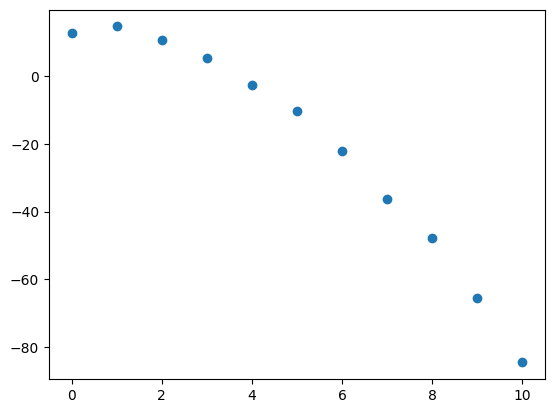

In [10]:
plt.scatter(x_train, y_train)
plt.show()

In [11]:
losses = []

for i in range(50000):
    
    index = np.random.randint(0, len(x_train))
    
    sample = x_train[index]
    
    prediction = y2(sample)
    
    label = y_train[index]
    
    a += step_a(prediction, label, sample)
    g += step_g(prediction, label, sample)
    c += step_c(prediction, label)
    
    L = MSE(prediction, label)
    losses.append(L)

Loss: 2.488567240346447, a, g, c : -1.0755188009100771, 1.1105269300087017, 11.163693489645256


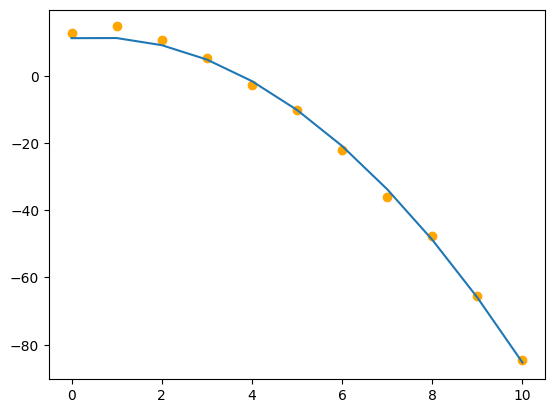

In [12]:
print(f"Loss: {MSE(y2(x_train), y_train)}, a, g, c : {a}, {g}, {c}")
plt.scatter(x_train, y_train, c='orange')
plt.plot(x_train, y2(x_train))
plt.show()

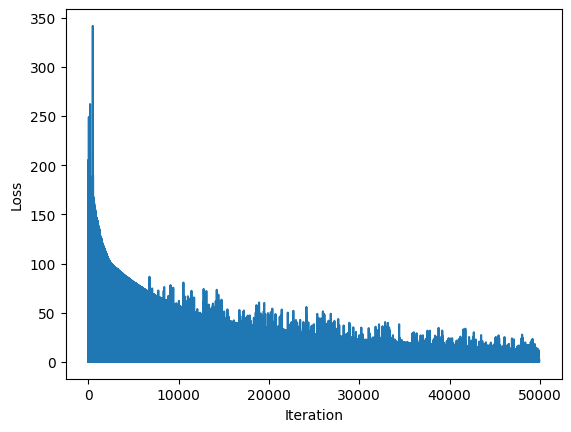

In [13]:
plt.plot(losses[100:])#[0:400], )#[0:20])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()